<a href="https://colab.research.google.com/github/Nouranaif33/Masar-2/blob/main/EA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Noura Naif alqahtani - Attrition of Employees**.


- In this NoteBook my Aim will be to analyze the datasets completely wrt each and feature and find the reasin behind Attrition of Employees.
- And what the top factors which lead to employee attrition?

<h2>import Libraries</h2>


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2>Get the Data</h2>

In [56]:
data = pd.read_csv("/content/Employee-Attrition.csv")

# <h2>Basic Data Exploration</h2>


In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
data.shape

(1470, 35)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Target Variable

In [13]:
attrition_count = pd.DataFrame (data[ 'Attrition' ].value_counts ( ))
attrition_count

,Attrition
No,1233
Yes,237


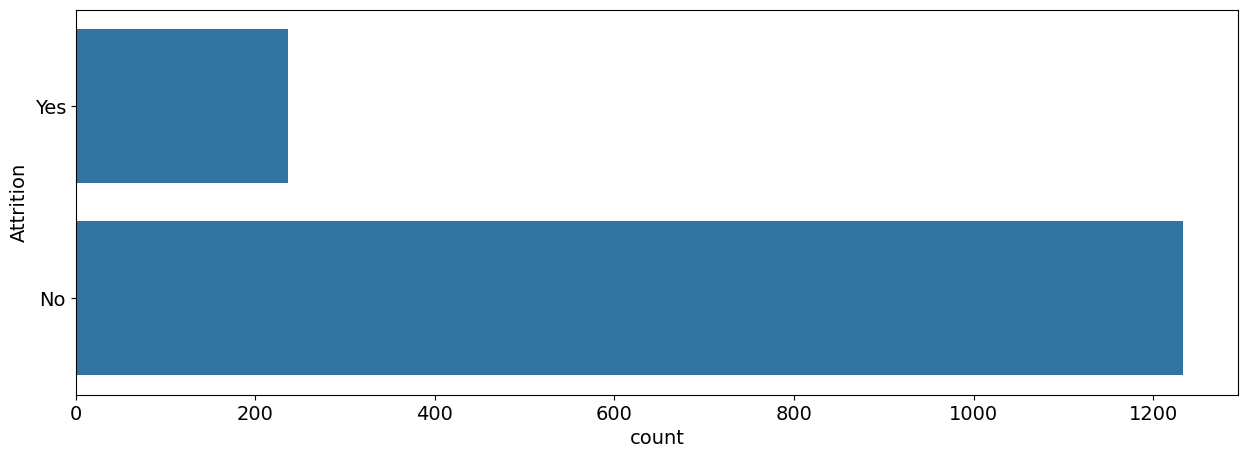

In [15]:
plt.figure(figsize=(15,5))
plt.rc("font", size=14)
sns.countplot(y ='Attrition',data=data)
plt.show()

# Exploratory Data Analysis

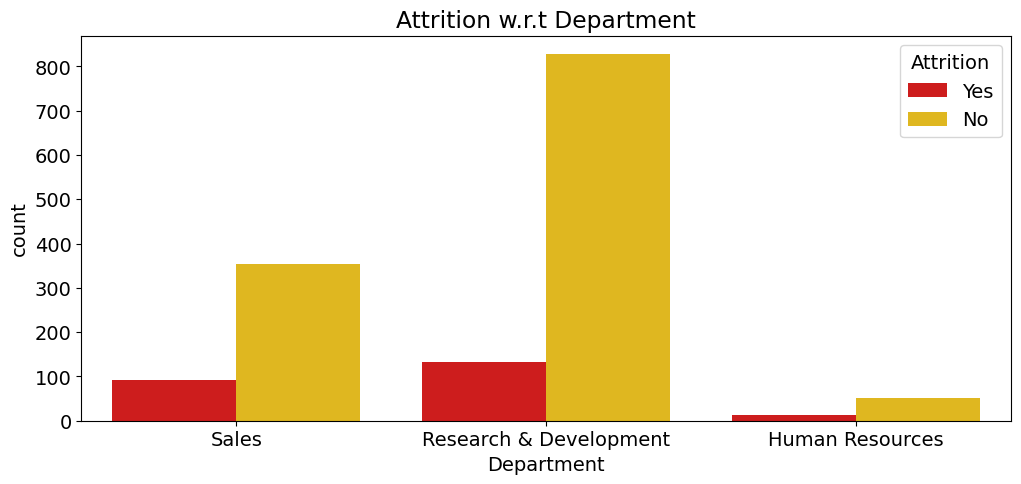

In [20]:
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='Attrition', data=data, palette='hot')
plt.title("Attrition w.r.t Department")
plt.show()

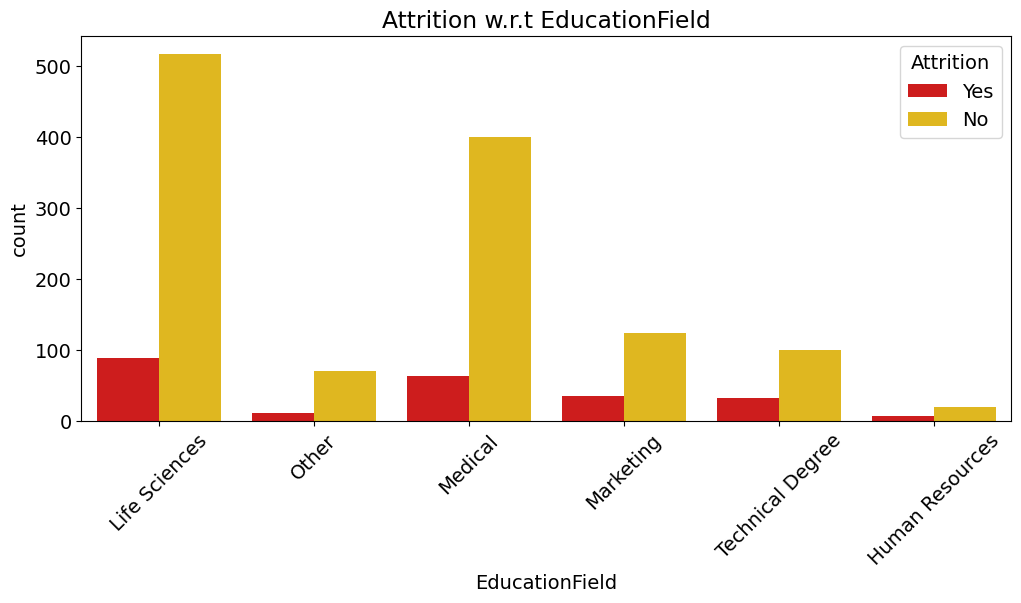

In [21]:
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField',hue='Attrition', data=data, palette='hot')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

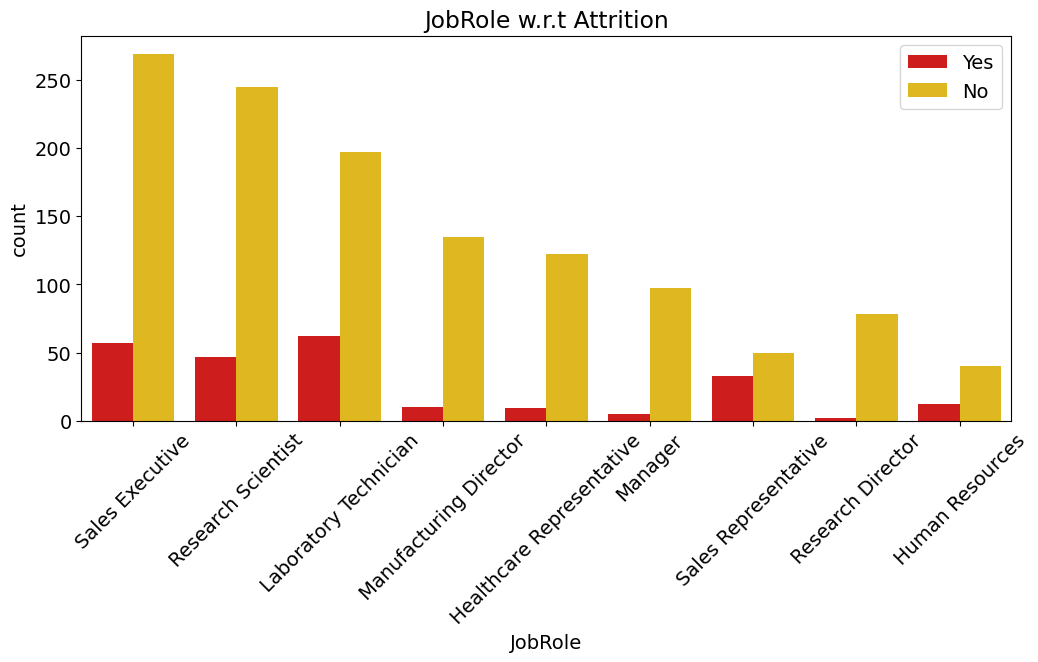

In [22]:
# let's see at which post most people are leaving the jobs
# JobRole
plt.figure(figsize=(12,5))
sns.countplot(x='JobRole',hue='Attrition', data=data, palette='hot')
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

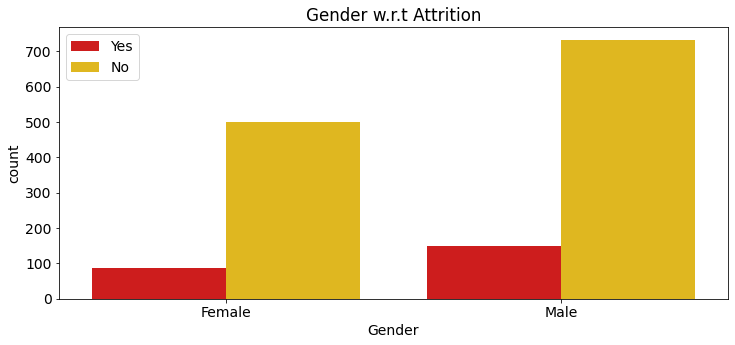

In [ ]:
# most male of female employes Attriate
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',hue='Attrition', data=data, palette='hot')
plt.title("Gender w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [24]:
data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [30]:

data.groupby('Gender').get_group('Female').transpose()

,0,3,6,11,15,18,20,22,25,26,...,1446,1450,1451,1453,1454,1457,1458,1460,1462,1464
Age,41,33,59,29,29,53,24,34,53,32,...,34,35,38,36,45,40,35,29,39,26
Attrition,Yes,No,No,No,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Frequently,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,1102,1392,1324,153,1389,1219,673,419,1282,1125,...,704,1146,345,1120,374,1194,287,468,722,1167
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Research & Development,...,Sales,Human Resources,Sales,Sales,Sales,Research & Development,Research & Development,Research & Development,Sales,Sales
DistanceFromHome,1,3,3,15,21,2,11,7,5,16,...,28,26,10,11,20,2,1,28,24,5
Education,2,4,3,2,4,4,2,4,3,1,...,3,4,2,4,3,4,4,4,1,3
EducationField,Life Sciences,Life Sciences,Medical,Life Sciences,Life Sciences,Life Sciences,Other,Life Sciences,Other,Life Sciences,...,Marketing,Life Sciences,Life Sciences,Marketing,Life Sciences,Medical,Life Sciences,Medical,Marketing,Other
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,5,10,15,20,23,26,28,32,33,...,2035,2040,2041,2045,2046,2051,2052,2054,2056,2060


In [35]:
#MaritalStatus wrt Attrition
data[data['MaritalStatus']=='Single'].transpose()

,0,2,5,8,11,14,19,21,22,23,...,1435,1436,1437,1449,1450,1454,1455,1460,1463,1464
Age,41,37,32,38,29,28,38,36,34,21,...,44,21,39,32,35,45,40,29,31,26
Attrition,Yes,Yes,No,No,No,Yes,No,Yes,No,No,...,No,No,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely
DailyRate,1102,1373,1005,216,153,103,371,1218,419,391,...,1037,501,105,529,1146,374,1322,468,325,1167
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Sales,Research & Development,Research & Development,...,Research & Development,Sales,Research & Development,Research & Development,Human Resources,Sales,Research & Development,Research & Development,Research & Development,Sales
DistanceFromHome,1,2,2,23,15,24,2,9,7,15,...,1,5,9,2,26,20,2,28,5,5
Education,2,2,2,3,2,3,3,4,4,2,...,3,1,3,3,4,3,4,4,3,3
EducationField,Life Sciences,Other,Life Sciences,Life Sciences,Life Sciences,Life Sciences,Life Sciences,Life Sciences,Life Sciences,Life Sciences,...,Medical,Medical,Life Sciences,Technical Degree,Life Sciences,Life Sciences,Life Sciences,Medical,Medical,Other
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,4,8,12,15,19,24,27,28,30,...,2020,2021,2022,2038,2040,2046,2048,2054,2057,2060


In [36]:
data[data['MonthlyIncome']>5993].transpose()


,8,15,18,22,25,27,28,29,31,43,...,1446,1448,1450,1452,1453,1461,1462,1463,1466,1467
Age,38,29,53,34,53,42,44,46,44,27,...,34,41,35,50,36,50,39,31,39,27
Attrition,No,No,No,No,No,No,No,No,No,No,...,No,No,No,Yes,No,Yes,No,No,No,No
BusinessTravel,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Rarely
DailyRate,216,1389,1219,419,1282,691,477,705,1459,994,...,704,930,1146,878,1120,410,722,325,613,155
Department,Research & Development,Research & Development,Sales,Research & Development,Research & Development,Sales,Research & Development,Sales,Research & Development,Sales,...,Sales,Sales,Human Resources,Sales,Sales,Sales,Sales,Research & Development,Research & Development,Research & Development
DistanceFromHome,23,21,2,7,5,8,7,2,10,8,...,28,3,26,1,11,28,24,5,6,4
Education,3,4,4,4,3,4,4,4,4,3,...,3,3,4,4,4,3,1,3,1,3
EducationField,Life Sciences,Life Sciences,Life Sciences,Life Sciences,Other,Marketing,Medical,Marketing,Other,Life Sciences,...,Marketing,Life Sciences,Life Sciences,Life Sciences,Marketing,Marketing,Marketing,Medical,Medical,Life Sciences
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,12,20,23,28,32,35,36,38,40,56,...,2035,2037,2040,2044,2045,2055,2056,2057,2062,2064


**OBSERVATIONS**
- Employees working in R&D department are more, but employees from sales department or at position like sales executive,sale Representative leaves the job early.
- Males are more under Attrition then Females

<Axes: ylabel='Frequency'>

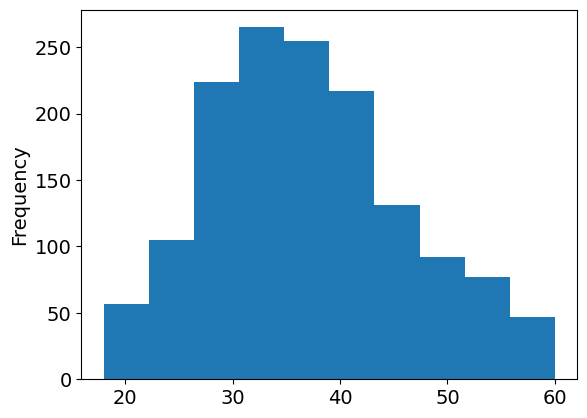

In [27]:
# distribution of age
data['Age'].plot.hist()

* Age column is very well normalized, most of employees are age between 25 to 40.


In [37]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
data[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


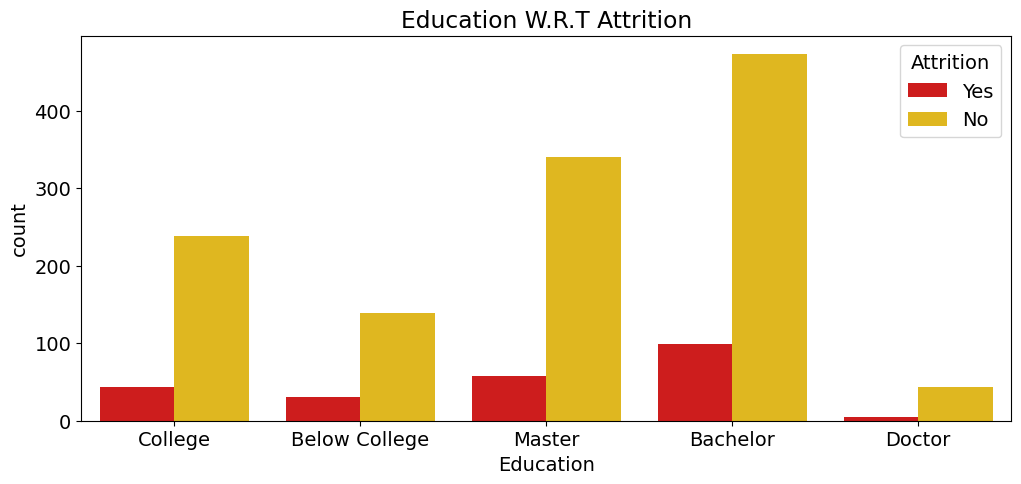

In [57]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(12,5))
sns.countplot(x=data['Education'].map(edu_map), hue='Attrition', data=data, palette='hot')
plt.title("Education W.R.T Attrition")
plt.show()

## Label Encodeing



In [39]:
# Target Variable(Attrition)
data['Attrition'] = data['Attrition'].replace({'No':0,'Yes':1})

In [40]:
#encode binary variables
data['OverTime'] = data['OverTime'].map({'No':0,'Yes':1})
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})

In [41]:
# encode categorical columns which are ordinal, use labelEncoding
# apply Label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoders = {}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [42]:
# look at the final data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


## Machine Learning: Splitting the data into Training and Testing sample


In [43]:
X = data.drop(['Attrition','Over18'], axis=1)
y = data['Attrition'].values

In [48]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [54]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1972, 33)
(1972,)
(494, 33)
(494,)


# Logistic Regression in Machine Learning



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [51]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [52]:
prediction=logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,prediction)
print("Accuracy Score -", accuracy_score(y_test , prediction))

Accuracy Score - 0.6417004048582996


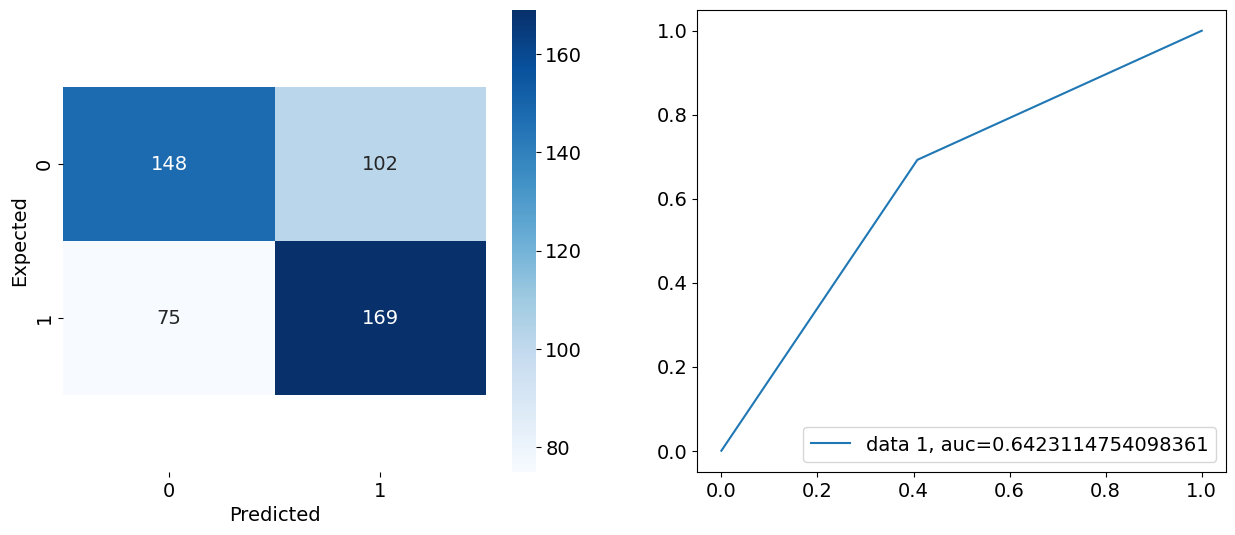

In [53]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

ax2 = fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  prediction)
auc = roc_auc_score(y_test, prediction)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()